In [21]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Load dataset CSV
df = pd.read_csv('data_mahasiswaa.csv')
print(df)

              NIM Jenis_Kelamin     Kelas Kode_WK Kode_MK  Nilai_MK
0    130592490001             P  DS 50 01     AOK   STD11       100
1    130592490002             P  DS 50 01     AOK   STD11        68
2    130592490003             P  DS 50 01     AOK   STD11        69
3    130592490004             P  DS 50 01     AOK   STD11        64
4    130592490005             P  DS 50 01     AOK   STD11        66
..            ...           ...       ...     ...     ...       ...
295  130592490296             P  DS 50 07     NAA   STD11        91
296  130592490297             L  DS 50 07     NAA   STD11        70
297  130592490298             P  DS 50 07     NAA   STD11        87
298  130592490299             P  DS 50 07     NAA   STD11        72
299  130592490300             L  DS 50 07     NAA   STD11        83

[300 rows x 6 columns]


In [23]:
# Hitung jumlah mahasiswa di setiap kelas
jumlah_mahasiswa_per_kelas = df.groupby('Kelas').size()

# Tampilkan hasil
print("Jumlah mahasiswa di masing-masing: ")
print(jumlah_mahasiswa_per_kelas)

Jumlah mahasiswa di masing-masing: 
Kelas
DS 50 01    40
DS 50 02    44
DS 50 03    41
DS 50 04    45
DS 50 05    45
DS 50 06    43
DS 50 07    42
dtype: int64


In [24]:
def UrutanNilaiRekursif(data, n=None):
    if n is None:
        n = len(data)

    if n <= 1:
        return data

    for i in range(n-1):
        if data.iloc[i]['Nilai_MK'] < data.iloc[i+1]['Nilai_MK']:
            data.iloc[i], data.iloc[i+1] = data.iloc[i+1], data.iloc[i]
    return UrutanNilaiRekursif(data, n-1)

# Mengurutkan data berdasarkan Nilai_MK secara rekursif
UrutanDF = UrutanNilaiRekursif(df)
print("Data Mahasiswa\n")
print(UrutanDF)

Data Mahasiswa

              NIM Jenis_Kelamin     Kelas Kode_WK Kode_MK  Nilai_MK
0    130592490001             P  DS 50 01     AOK   STD11       100
1    130592490073             P  DS 50 02     AOK   STD11       100
2    130592490148             P  DS 50 04     DBA   STD11       100
3    130592490191             L  DS 50 05     DBA   STD11       100
4    130592490192             P  DS 50 05     DBA   STD11       100
..            ...           ...       ...     ...     ...       ...
295  130592490204             L  DS 50 05     DBA   STD11        60
296  130592490212             P  DS 50 05     DBA   STD11        60
297  130592490244             L  DS 50 06     NAA   STD11        60
298  130592490291             P  DS 50 07     NAA   STD11        60
299  130592490293             P  DS 50 07     NAA   STD11        60

[300 rows x 6 columns]


In [25]:
def UrutanNilaiIteratif(data):
    n = len(data)
    # Loop utama untuk iterasi
    for i in range(n):
        # Loop untuk membandingkan elemen berpasangan
        for j in range(0, n-i-1):
            if data.iloc[j]['Nilai_MK'] < data.iloc[j+1]['Nilai_MK']:
                # Tukar elemen jika tidak dalam urutan yang benar
                data.iloc[j], data.iloc[j+1] = data.iloc[j+1], data.iloc[j]
    return data

# Mengurutkan data secara iteratif
UrutanDF = UrutanNilaiIteratif(df)
print("Data Mahasiswa (Iteratif)\n")
print(UrutanDF)

Data Mahasiswa (Iteratif)

              NIM Jenis_Kelamin     Kelas Kode_WK Kode_MK  Nilai_MK
0    130592490001             P  DS 50 01     AOK   STD11       100
1    130592490073             P  DS 50 02     AOK   STD11       100
2    130592490148             P  DS 50 04     DBA   STD11       100
3    130592490191             L  DS 50 05     DBA   STD11       100
4    130592490192             P  DS 50 05     DBA   STD11       100
..            ...           ...       ...     ...     ...       ...
295  130592490204             L  DS 50 05     DBA   STD11        60
296  130592490212             P  DS 50 05     DBA   STD11        60
297  130592490244             L  DS 50 06     NAA   STD11        60
298  130592490291             P  DS 50 07     NAA   STD11        60
299  130592490293             P  DS 50 07     NAA   STD11        60

[300 rows x 6 columns]


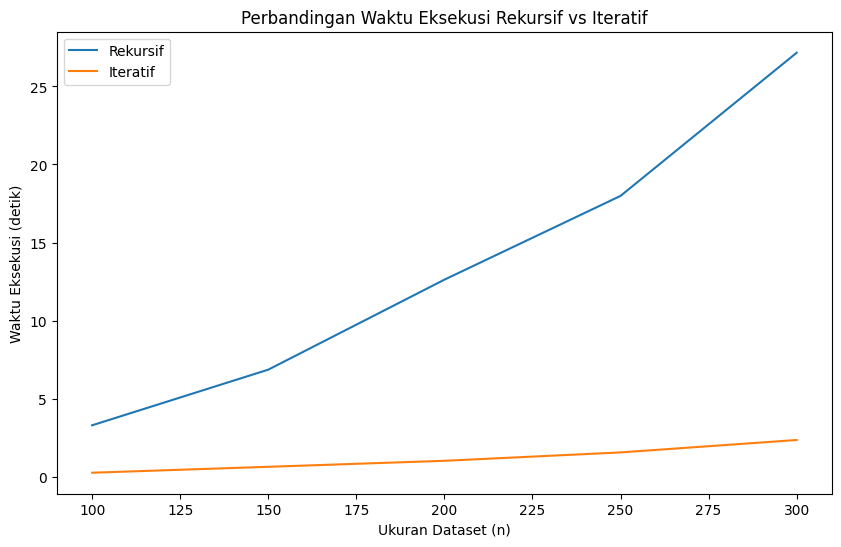

In [26]:

# Menentukan ukuran dataset untuk tiap iterasi
n_values = [i for i in range(100, 301, 50)]

rekursif_times = []
iteratif_times = []

for n in n_values:
    # Ambil sampel dengan batas jumlah maksimal baris yang ada
    df_temp = df.sample(min(n, len(df)), replace=False)

    # Rekursif
    start_time = time.time()
    UrutanNilaiRekursif(df_temp)
    rekursif_times.append(time.time() - start_time)

    # Iteratif
    start_time = time.time()
    UrutanNilaiIteratif(df_temp)
    iteratif_times.append(time.time() - start_time)

# Plotting

plt.figure(figsize=(10, 6))
plt.plot(n_values, rekursif_times, label='Rekursif')
plt.plot(n_values, iteratif_times, label='Iteratif')
plt.xlabel('Ukuran Dataset (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Rekursif vs Iteratif')
plt.legend()
plt.show()
